# <center>Assignment 2</center>

<b>Due Date</b>: Thursday, February 7, 11:59pm. To be submitted via brightspace. <br>
<b>Please note</b>: Can be done in pairs. <b>Submit from only one of the team members' accounts, i.e. do not submit from two different accounts</b>; please indicate both names & student numbers clearly on the submission.

This assignment is on Decision Trees and Linear Regression. It is preferred that you code in Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer ###  Added vectorizer import
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.model_selection import learning_curve

Download the following datasets from google drive [The links and names are embedded in the commands]. 

Those who use Linux/Mac/Colab can directly run the below cell by uncommenting the commands. 

In [3]:
# !curl -L -o real_news.txt "https://drive.google.com/uc?export=download&id=1pVbIc8ZGqsNVQE7UXa6Pu5VxkW57Uono"
# !curl -L -o fake_news.txt "https://drive.google.com/uc?export=download&id=1ejl2esjM8heh90hjdtUh39h3ysLeNa3A"
# !curl -L -o houses.csv "https://drive.google.com/uc?export=download&id=1mwmM-EF58LRQjm0Hj5oirRAIXuTvlDzP"

<table>
  <tr>
    <td>**Section**</td>
    <td>**Score**</td>
  </tr>
  <tr>
    <td> Decision Trees </td>
    <td> 20 </td>
  </tr>
  <tr>
    <td> Linear Regression </td>
    <td> 40 </td>
  </tr>
    <tr>
    <td> Bonus (this is optional) </td>
    <td> 5 </td>
  </tr>
  <tr>
    <td> **Total**  </td>
    <td> **60 (+5 if you attempt the bonus question)** </td>
  </tr>
  </table>

## 1. Decision Trees [20 pts]

We will train a Decision Tree (sklearn) for building a real vs fake news headlines classifier. The details of the dataset are as follows:
* The fake news headlines are taken from https://www.kaggle.com/mrisdal/fake-news/data.
* The real news headlines are taken from https://www.kaggle.com/therohk/million-headlines.
* For the purposes of the assignment, only headlines containing the word "trump" are used.
* The resulting datasets, real_news.txt and fake_news.txt, contain 1968 real and 1298 fake news headlines. 

Instructions for ```load_dataset``` [2 pts]:
1. Load the real_news and fake_news datasets. 
2. Vectorize the given texts using SkLearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">TF-IDF Vectorizer</a>. Refer to the example given. <br>
[Come up with a way to store the words and their indices - you will need it for visualize]
3. Now, split the dataset randomly into train [70%], validation[15%] and test [15%].
4. Return these values.

Instructions for ```select_model``` [3 pts]:
1. Train <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Decision Trees</a> by varying the ```max_depth``` parameter [Use 'entropy' as the criterion.]. <br> <b>Q:</b> Why might we vary the max_depth parameter? [1 pt]

<b> We choose to vary max_depth as a parameter because it determines how many decisions we make on our data, and is essentially the determining factor about whether we are fitting enough, overfitting or underfitting. If we make too many decisions then we may overfit, if we make to little we won't have a good enough idea of what's real or fake. </b>
2. Try out at least 5 different values. <br> <b>Q:</b> How did you choose potential values? [1 pt]

<b> I chose the first five factors of 2 to see how the accuracy changes when you go from very small values of max_depth to higher values of max_depth, and we can see that we hit a break point where our accuracy starts going lower once we get higher max_depth values suggesting overfitting.</b>
3. For each of the classifiers, print out the accuracies on the validation dataset.
4. Return the best performing model.

Instructions for ```visualize``` [5 pts]:
- Visualize the first two levels of the best decision tree, using any means you wish: either hand-drawing a figure, or displaying text, or otherwise, as long as key details are clear, e.g. the word & decision boundary at each node, etc.
- Write the code you used to extract this info inside the function. 

Instructions for ```information_gain```[5 pts]:
- Compute the $I(Y;x_i)$ where $Y$ is the random variable signifying whether the headline is real or fake, and $x_i$ is the word in the headline used to determine the split in the data.  

In [4]:

def load_dataset():
    
    with open('fake_news.txt') as f: 
        fake_news = f.read().splitlines()
        
    with open('real_news.txt') as f:
        real_news = f.read().splitlines() 
        
    all_news = fake_news + real_news          #  Make a list containing all of the headlines
            
    labels = np.zeros(len(all_news))
    labels[0:len(fake_news)] = 1              #  1 means fake, 0 means real

    allNews = TfidfVectorizer()               # initialize the vectorizer
    all_news_vectorized = allNews.fit_transform(all_news)  #  Vectorize all of the news
    allWords = allNews.get_feature_names()                 #  Find the key words
    
    

    
    X_train, X_test, y_train, y_test = train_test_split(all_news_vectorized, labels, test_size=0.15, random_state=1) # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) # Split the data again
    
    train = [X_train,y_train]   #  data,labels
    validation = [X_val,y_val]  #  data,labels
    test = [X_test,y_test]      #  data,labels
    # Code here.
    return train, validation, test , allWords , all_news , real_news # Added extra outputs for further functions

In [5]:
def select_model(train,validation):
    
    values = (np.arange(5)+1)*2 #  List of maxDepth values
    accuracies = []
    
    for depth in values: #  loop over all of the depths
        clf = DecisionTreeClassifier(criterion='entropy',max_depth=depth) #  Initialize a classifier with max_depth=depth
        clf.fit(train[0],train[1])                                        #  train it
        accuracies.append(accuracy_score(validation[1],clf.predict(validation[0]))) #  Use sklearns accuracy_score to get accuracy
    print('The accuracies for the following depths: ',values,' are : ',accuracies)  #  print out the accuracies
    best_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=values[np.argmax(accuracies)]) # best classifier is that with highest accuracy
    best_classifier.fit(train[0],train[1])  #  Refit our new best classifier
    
    return best_classifier  #  return the best classifier

In [6]:
def visualize(decisionTree,allWords):
    data = tree.export_graphviz(decisionTree,out_file=None,feature_names=allWords,class_names=['real','fake'],rounded=True) 
    graph = graphviz.Source(data) # using graphviz plots out the decision tree
    graph.render() #  makes a pdf in cwd


In [7]:
def information_gain(data,word):
    
    real_news = data[1] #  All the real headlines
    realSamples = len(real_news) #  number of real headlines
    fakeSamples = len(data[0])-realSamples #  number of fake is total headlines - number of real ones
    
    positivesContains = 0 #  initializing tracking variables
    negativesContains = 0
    positivesNoContains = 0
    negativesNoContains = 0
    
    contains = []  #  initializing lists to have headlines that contain the key word or not
    noContains = []
    
    samples = len(data[0]) #  total number of headlines
    
    for i in range(samples): #  for all of the headlines
        temp = data[0][i].split()  #  take headline and split it
        if word in temp:           #  see if our word is in the headline or not
            contains.append(data[0][i])  #  if it is, append the headline to contains
        else:
            noContains.append(data[0][i]) #  if it isn't, append the headline to noContains
            
            
    for i in contains:  #  loop over all of the headlines that contain the word
        
        if i in real_news: #  check if those headlines are real or not
            positivesContains += 1
        else:              #  if they aren't real they must be fake
            negativesContains += 1
             
    for i in noContains:  #  do the same procedure but for headlines that don't contain our word
        if i in real_news:
            positivesNoContains += 1
        else:
            negativesNoContains += 1
        
    totalContains = len(contains) #  how many headlines contained the word
    totalNoContains = len(noContains) #  how many headlines didn't contain the word
    #  Calculating the entropy of prior to checking the word, then calculating the entropy in the two children (contains or noContains)
    entropyBefore = -(realSamples/samples)*np.log2(realSamples/samples) - (fakeSamples/samples)*np.log2(fakeSamples/samples)
    entropyContains = -(positivesContains/totalContains)*np.log2(positivesContains/totalContains) - (negativesContains/totalContains)*np.log2(negativesContains/totalContains)
    entropyNoContains = -(positivesNoContains/totalNoContains)*np.log2(positivesNoContains/totalNoContains) - (negativesNoContains/totalNoContains)*np.log2(negativesNoContains/totalNoContains)
    
    #  Return entropy -  [ p(contains)entropy(contains) + p(noContains)entropy(noContains) ] 
    return (entropyBefore - (totalContains/samples*entropyContains+totalNoContains/samples*entropyNoContains) )

In [8]:
train, validation, test, allWords, all_news, real_news = load_dataset()
best_classifier = select_model(train, validation)

The accuracies for the following depths:  [ 2  4  6  8 10]  are :  [0.750599520383693, 0.7649880095923262, 0.7937649880095923, 0.8009592326139089, 0.7961630695443646]


In [9]:
visualize(best_classifier,allWords) ###  Visualize won't output anything unless you have graphviz downloaded through Conda
# However I have embedded the resulting images in my notebook below

Write down the cleaned version of the output of visualize function below:
##
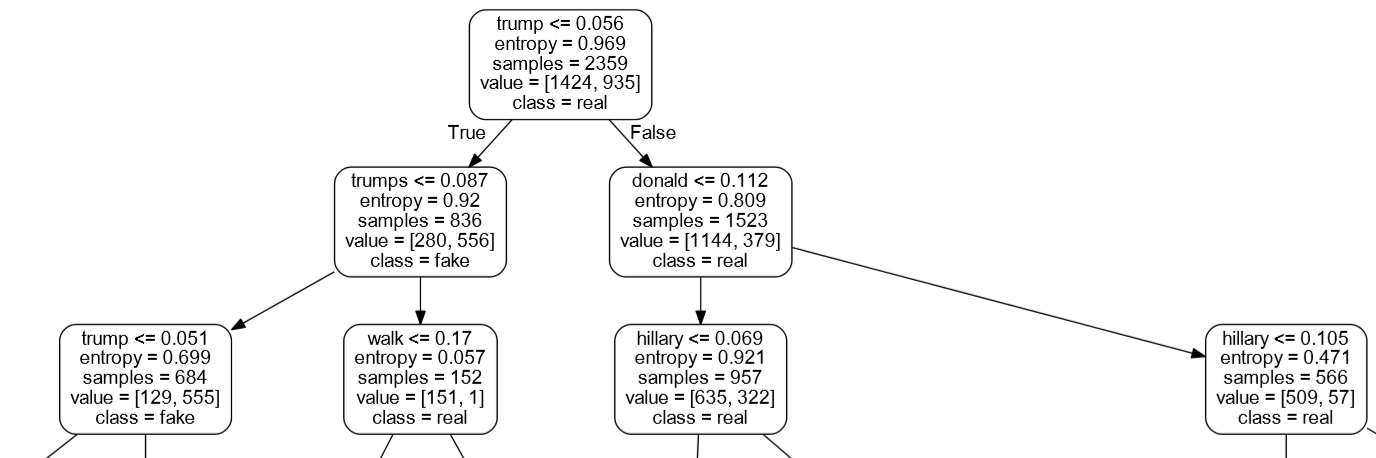


In [29]:
testWords = ['trump','walk','donald','trumps','hillary']
gain = []
for i in testWords:
    gain.append(information_gain([all_news,real_news],i))
print('The information gain from the following words: ',testWords,' respectively are: \t\t ',gain)
# Write code to evaluate the information_gain of the root word 
# chosen by the best_classifier and show the outputs for at least 
# 5 different carefully chosen words.  [3 pts]

The information gain from the following words:  ['trump', 'walk', 'donald', 'trumps', 'hillary']  respectively are: 		  [0.033652112145386215, 0.003507651727826855, 0.04989943188990642, 0.043932565343471786, 0.037640139015829965]


## 2. Linear Regression

### Review Questions [10 pts (+5 bonus)]:

1. <b> Update rule: </b>In addition to the usual loss term based on residuals, the cost function of linear regression can also incorporate a term for something called <i>regularization</i>. (The intuition behind this will be discussed in class later, but for now all you need is the equation). The cost function is then given as the sum of the squares of the residuals, plus an additional regularization term as follows:

    $$\epsilon = \frac{1}{2N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 + \frac{\lambda}{2} \sum_{j=0}^{D} w_j^2$$
   
   - N - size of training data
   - t - Target output
   - The predicted output $y$ is computed for a given $x$ as $$y = \sum_{j=0}^{D} w_jx_j$$ 
  Assume that $x_0$ is always set to 1,  so that $w_0$ behaves as the bias term (this is just a notational convenience).
   - D - Number of dimensions of each training data
   - $\lambda$ - controls the amount of regularization. Assume it is fixed to have some value between 0 and 1. 
   - $\epsilon$ - The cost function to be minimized
   
   <b>Q:</b> Fill in the Gradient descent update rule for $w_j$ below [2 pts]:
   
   $$w_j \leftarrow w_j - \frac{1}{N} \sum_{i=1}^{N} (w_jx_j^{(i)}-y^{(i)})x_j^{(i)} + \lambda w_j $$
   
   <b>Q:</b> This type of regularization is called "weight decay". Based on the above update rule, can you guess why? [1 pt] <br>
   Hint: Requires rearranging and grouping terms. 

<b>A: It is called weight decay because it is a term that affects the amount $w_j$ is changing in way that such that larger weights can't grow as fast, e.g. controlling the weights from going out of control and depending on only one parameter, or leading the model to diverge.   </b>

2. <b>Cost function: </b> Consider a Linear regression model in 2D space with 2 weights and no bias term:
    $$ y = w_1 x_1 + w_2 x_2 $$ <br>
    With MSE (mean-squared error), the total cost for the dataset is $\epsilon = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 $.
    
    Given a training set consisting of $N=3$ examples:
    - $x^{(1)}=(2,0), t^{(1)} = 1$
    - $x^{(2)}=(0,1), t^{(2)} = 2$
    - $x^{(3)}=(0,1), t^{(3)} = 0$
    
   Write the cost in the form
    $$ \epsilon = c_1 (w_1 - d_1)^2 + c_2 ( w_2 - d_2)^2 + c_3$$
    
   <b>Q: </b> What are the values of $c_1, d_1, c_2, d_2$ and $c_3$? [2 pts] <br>
   <b>A: $ c_1 = \frac{4}{3} , d_1 = \frac{1}{2} , c_2 = \frac{1}{3} , d_2 = 2 , c_3 = \frac{(w_2)^2}{3} $ </b> <br>
   
   <b>Q: </b> Plot the above function for $\epsilon = 1$; you may hand-draw it or use desmos graphing calculator. What shape does the cost function represent? [5 pts] <br>
   <b>A: The cost function represent an ellipse.</b><br>
   
   
  - <b>Bonus Q: </b> Repeat by setting $\epsilon=0$. What do you observe? Why? [2 pts] <br>
    <b>A: You no longer see anything (on desmos). This is because once you have $\epsilon = 0$ you are saying that this oval has converged so small such that it is a single point. </b><br>
    
    
  - <b>Bonus Q: </b> Gradient Descent usually converges to the local minima; however, Linear Regression converges to the global minimum as there is only one minimum. What is your estimate of the number of different values of w1 and w2 at convergence? [3 pts] <br>
 <b> A: There should only be one set of values $(w_1 , w_2)$ </b> <br>

### 2.1 House Prices Data [5 pts]
We will apply linear regression to predict house sale prices based on the data for houses sold in King County between May 2014 and May 2015. 

This is the description of the dataset we will be using:

In [11]:
houses = pd.read_csv("houses.csv")
houses.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [12]:
house_data = np.array(houses)
X = house_data[:,1:] # Extract all columns of house_data excepting the price into X
Y = house_data[:,0] # Extract the price column of house_data into targets.


### 2.2 Linear Regression Code [10 pts]

For this assignment, we will train a simple linear regression model without any regularization. 

In [14]:
def linear_regression(data,
                      targets,
                      learning_rate,
                      epochs,
                      normalize = True,
                      validate_code = False,
                      plot_learning_curve = False,
                      return_predictions = False
                     ):
    """
    The arguments are self-descriptive. 
    """
    
    # Store the coefficients and bias term in the parameters. 
    # Initialize them with zeros.
    # Try and except to see if the data is just a one dimensional array in which case we only have one parameter otherwise its the shape
    try:
        numberParameters = data.shape[1]
    except:
        numberParameters = 1
        data.reshape(-1,1)
    parameters = np.zeros(numberParameters+1)
    
    
    if normalize:
        # Normalize the data to have zero mean and unit variance.
        # Update the dataset.
        data = (data-np.mean(data))/np.std(data)
  
     
    costs = []
    
    for epoch in range(epochs):
        
        derivatives = np.zeros_like(parameters) # Initialize the derivatives to 0 and then calculate them
        hypothesis = np.matmul(data , parameters[:numberParameters]) + parameters[numberParameters] # Calculate our guesses
        
        derivatives[numberParameters] = np.sum(hypothesis-targets)            # Find the derivatives of each w_j parameter
        derivatives[:numberParameters] = np.matmul((hypothesis-targets),data) # Find the derivative of the bias
                     
        parameters -= derivatives*learning_rate/len(targets)                  # Update the parameters using the derivatives

        # Compute the new cost and append it to the list
        cost = np.sum(np.power(hypothesis-targets,2))/len(targets) 
        costs.append(cost)
        
    # Compute the predicted MSE Values.
    predictions = np.squeeze(np.matmul(data,parameters[:numberParameters])+parameters[numberParameters]) 
    # Recalculating our prediction with the newest parameter values
    
    # Validation code. Already done for you. 
    if validate_code:
        lr = LinearRegression()
        lr.fit(data,targets)
        print("The coefficients and bias term of the custom LR:", parameters.reshape(-1))
        print("The coefficients of the SkLearn LR:\t\t", lr.coef_.reshape(-1))
        print("The bias of the SkLearn LR\t\t\t",lr.intercept_)    
        print("SkLearn MSE \t\t\t",mean_squared_error(targets,lr.predict(data)))
    
    # Print the MSE at the end of training. 
    final_mse = mean_squared_error(targets,predictions)
    print("MSE after training: ",final_mse)
    
    if plot_learning_curve:
        train_sizes = (np.array([.1,.20,.40,.60,.80])*len(data)).astype(int) # different training sizes to see learning curve
        MSEs = []
        for i in train_sizes: # calculate the predictions for each train_size and get the mean squared errors
            predictions = linear_regression(data[:i],targets[:i],learning_rate=learning_rate,epochs=epochs,plot_learning_curve=False,return_predictions=True)
            MSEs.append(mean_squared_error(targets[:i],predictions))
            
        plt.figure() #  plot the mean squared errors against the train_sizes 
        ax = plt.gca()
        ax.set_xscale('log')
        #ax.set_yscale('log') ## I commented the logged y scale, because I noticed it wasn't giving me any y axis values sometimes
        plt.scatter(train_sizes , MSEs)
        plt.xlabel('training set sizes')
        plt.ylabel('Mean Squared Errors')
        plt.title('learning_rate = %.e'%(learning_rate))
        # Plot the learning curve. Use log scale. 
    
    # Return the required results. Already done for you. 
    if return_predictions:
        return predictions    

First, let's validate the code written using a simple synthesized dataset. <br>


[Verify your answer by manually comparing the parameters.]

In [15]:
X_simple = np.random.randn(100,3) # 100 3D data points
w = np.array([[1],[2],[3]])
b = 10
Y_simple = np.squeeze(np.matmul(X_simple,w)+b)
linear_regression(X_simple,
                          Y_simple,
                          learning_rate=1, 
                          epochs=30,
                          validate_code=True)

The coefficients and bias term of the custom LR: [0.94146625 1.8829325  2.82439875 9.77263734]
The coefficients of the SkLearn LR:		 [0.94146625 1.8829325  2.82439875]
The bias of the SkLearn LR			 9.772637341078664
SkLearn MSE 			 4.283514715350094e-30
MSE after training:  5.6009124270691835e-31


### 2.3 Experiments [2+2+3]

Now, vary the learning_rates [Ex: In orders of 10 - 10, 1, 0.1, 0.01, 0.001] and plot the learning curves for each of them. 

Choose the best-performing model for 10000 iterations.

MSE after training:  67026.15199659497
MSE after training:  72220.65207842182
MSE after training:  74884.8935323974
MSE after training:  72055.65356157256
MSE after training:  67579.84910861589
MSE after training:  65969.8963548949
MSE after training:  79913.67429288468
MSE after training:  88254.59648415558
MSE after training:  89975.37980150638
MSE after training:  88885.03032774586
MSE after training:  82226.50650921089
MSE after training:  79824.43004702532
MSE after training:  124175.77034119896
MSE after training:  133969.54401649896
MSE after training:  140096.36406546045
MSE after training:  135581.3695853063
MSE after training:  126327.5675216518
MSE after training:  123920.8550811527
MSE after training:  159626.90909180132
MSE after training:  167554.9915881001
MSE after training:  176095.908681654
MSE after training:  170287.69451735367
MSE after training:  160193.29677640027
MSE after training:  157988.52392400155
MSE after training:  328860.3545171799
MSE after training:  

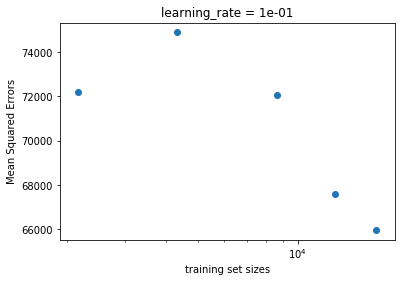

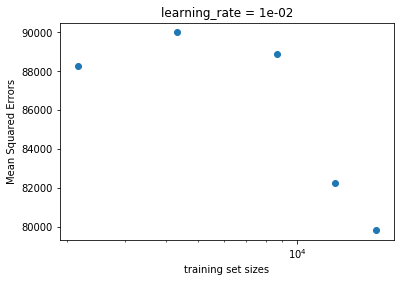

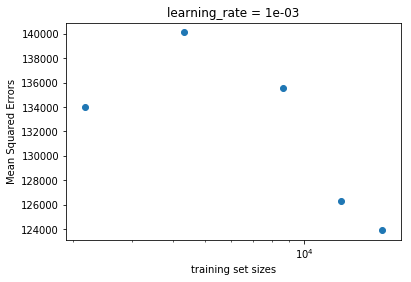

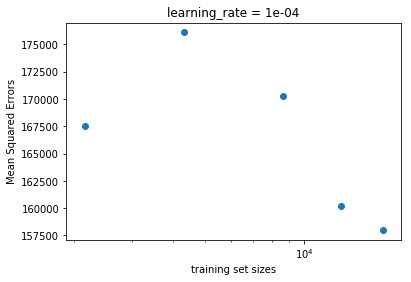

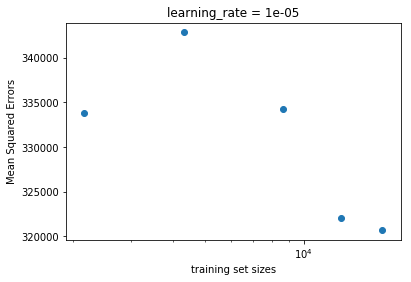

In [16]:
# Code Here.
learning_rates = np.logspace(-1,-5,5,base=10)
iterations = 10000
for i in learning_rates: # get the learning curve for a bunch of different learning rates
    linear_regression(X,Y,learning_rate=i,epochs=iterations,plot_learning_curve = True) #
    # Can change the code to run using X_simple,Y_simple if thats what was desired, it was unclear to me in the moment

For the best-performing model, plot the graph of predicted prices vs actual prices (scatter plot).

MSE after training:  67026.15199659497


Text(0,0.5,'Predicted prices')

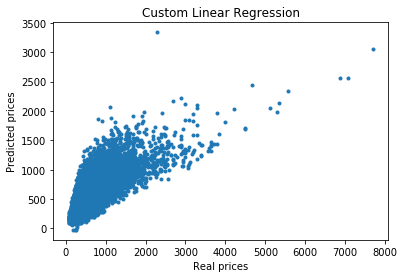

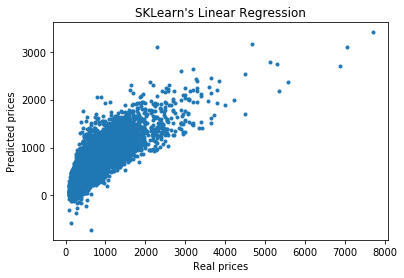

In [17]:
# When learning_rate is set to 1, it won't predict house data (diverges), so .1 is next best
predictionsMine = linear_regression(X,Y,learning_rate=.1,epochs=iterations,return_predictions=True)

lr = LinearRegression() # See how SKLearn performs as well
lr.fit(X,Y)
predictions = lr.predict(X) 

plt.figure() # Custom Linear Regression 
plt.title('Custom Linear Regression')
plt.scatter(Y,predictionsMine,marker='.')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')


plt.figure()
plt.scatter(Y,predictions,marker='.')
plt.title('SKLearn\'s Linear Regression')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')



Plot the predictions of the best-obtained model as a function of the sqft_living. 

Now, train a linear regressor (LR2) that predicts the house price only based on sqft_living. 
In the same plot as above, plot the graph of LR2 predictions vs sqft_living.

MSE after training:  68351.28683303982


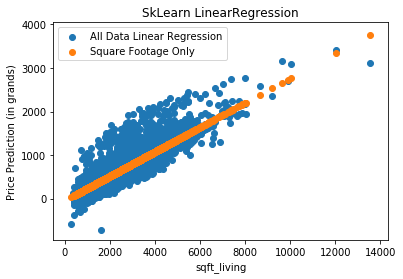

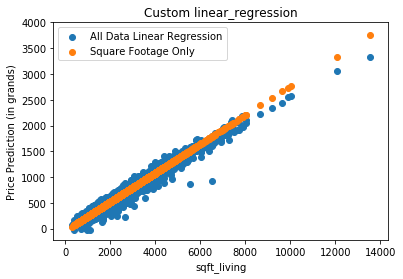

In [18]:
# Code Here.

plt.figure(1)
plt.scatter(X[:,2],predictions,label='All Data Linear Regression') #  Plot SKLearn predictions vs sqft_living
plt.title('SkLearn LinearRegression')
plt.xlabel('sqft_living')
plt.ylabel('Price Prediction (in grands)')
plt.figure(2)
plt.scatter(X[:,2],predictionsMine,label='All Data Linear Regression') #  Plot custom linear_regression predictions vs sqft_living
plt.title('Custom linear_regression')
plt.xlabel('sqft_living')
plt.ylabel('Price Prediction (in grands)')

#  Only give in the sqft_living data into custom linear regresser
new_data = X[:,2]
new_data = new_data.reshape(-1,1)
predictionSqFtMine = linear_regression(new_data,Y,learning_rate=0.1,epochs=iterations,return_predictions=True)
#  Only give in the sqft_living data into SKlearns LinearRegression
lr = LinearRegression()
lr.fit(new_data,Y)
predictionSqFt = lr.predict(new_data)

plt.figure(1)
plt.scatter(X[:,2],predictionSqFt,label='Square Footage Only') #  Overlay sqft_living taught SKlearn regresser overtop all data sklearn
plt.legend()

plt.figure(2)
plt.scatter(X[:,2],predictionSqFtMine,label='Square Footage Only') #  Overlay sqft_living taught custom regresser overtop all data custom regresser
plt.legend()

### 2.4 Observations [8 pts]

In this part, list the various conclusions you made from the experiments above. <br>
For example: 
- What did you learn by observing the various plots above? 
- How well did Linear Regression perform?
- Can you think of a way to improve the performance?
- etc.

<b> 
A: You can see that the custom linear regression depended heavily on the square footage values when determining the overall price when using all of the available data, you can make this conclusion because when you plot the difference between the regression for all considered data in comparison to just considering the square footage data there is a very small change in overall predictions. 
    
<b>If we look at the earlier set of plots we see that the Linear regression didn't seem to work all that great, considering that the line was definitely not of slope one, which would mean that all of our predictions were correct. The predicted values strayed from the exact values significantly throughout the process.

<b>I compared in both cases between the custom linear regression that I had written and the linear regression written by SKLearn and found that they both didn't work very well, concluding that the lack of agreement with the targets wasn't a bug in my code. This suggests that even just information on a house isn't enough to accurately estimate the price of the house, and there are always different parameters to be considering.

<b>It can also be concluded that a larger learning rate will get you a better solution given a fixed number of epochs. However yhere also exist large enough learning rates that will cause the program to diverge and not find parameter values, suggesting a sweetspot exists. 
    
<b> Performance could be improved by introducing a weight decay term like how we saw earlier, this would improve performance because other parameters would be taken more into consideration and should overall increase the accuracy of the predictions, since sqft_living should not be the only thing taken into consideration when evaluating a houses price.
</b>